In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
#General information and tuning

In [3]:
data = pd.read_csv('train.csv') #download data

In [91]:
data.head() #first 5 row of data

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Products  
0                   0                   0      8370         3  
1                   6                  14     15200        21  
2                   0                   0      1422        12  
3                  14                   0      1057        26  
4                   0                   0      7969         8

In [92]:
data.shape

(550068, 13)

#### Our data set has taken from the Kaggle
https://www.kaggle.com/abhisingh10p14/black-friday

It represents the cystomers' behaviour and consists from some colomns:

- User ID - unique ID. Its important to notice that one customer can buy several times

- Product_ID - unique ID of each product.

- Gender - M (male) F(female)

- Age - different categories: 0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+

- Stay_In_Current_City_Years - how many years user lives in this city

- Occupation - how many yers the person live in the USA

- City_Category - 'A','B','C' categories

- Product_Category(1,2,3) - number of products in each category

- Purchase - money per one purchase

- Marital_Status - 1,0 - married or not

###### Pros:
- 550068 rows
- different interesting attributes that can really reveal customers' behaviour
- trustworthy data

##### Cons:
- we do not know that means City_Category. Consequently, we can not explain connection between city category and customers' behaviour
- some missing data in Product_Category_2,3
- if a customer bought different products we do not now how Purchase divides


In [6]:
data.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
data['Product_Category_2'].fillna(0, inplace=True) 
data['Product_Category_3'].fillna(0, inplace=True) 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
#change type of data
data['Product_Category_2'] = data['Product_Category_2'].astype(int)
data['Product_Category_3'] = data['Product_Category_3'].astype(int)

In [10]:
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                   0                   0      8370  
1                   6                  14     15200  
2                   0                   0      1422  
3                  14                   0      1057  
4                   0                   0      7969

## Main attribute 1 - Gender's investigation

In [11]:
data_men = data[data['Gender'] ==  'M']
data_women = data[data['Gender'] ==  'F']
spend_men = int(data_men['Purchase'].sum()/data_men['User_ID'].count())
spend_women = int(data_women['Purchase'].sum()/data_women['User_ID'].count())
title = ('There are {} women and {} men in the Black Friday dataset. Men quantity exceed women in {} times. In average men spend {}, women spend {}'
 .format(sum(data.Gender == 'F'), 
         sum(data.Gender == 'M'), 
         int(sum(data.Gender == 'M')/sum(data.Gender == 'F')), spend_men, spend_women))


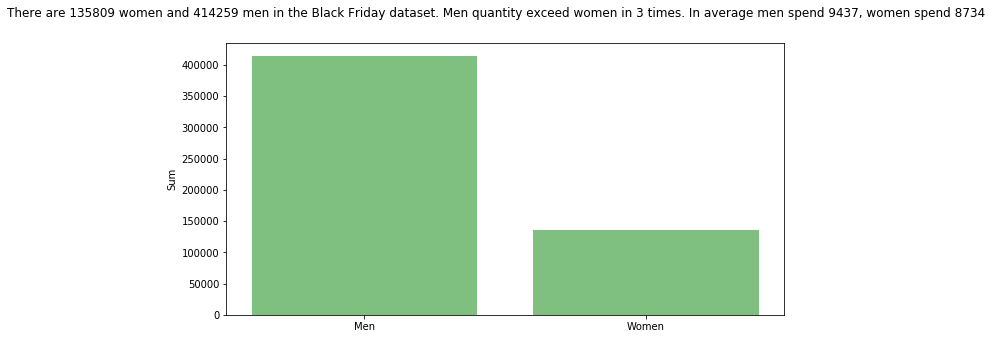

In [12]:
names = ['Men', 'Women']
values = data['Gender'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(names, values, linewidth=2.0, alpha=0.5, color='green')
plt.ylabel('Sum')
plt.suptitle(title)
plt.show()

##  Supportive attribute 1 - Age investigation

In [13]:
data_men['Age'].value_counts()

26-35    168835
36-45     82843
18-25     75032
46-50     32502
51-55     28607
55+       16421
0-17      10019
Name: Age, dtype: int64

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['26-35', '36-45', '18-25', '46-50 ', '51-55', '55+', '0-17']
men = data_men['Age'].value_counts()
women = data_women['Age'].value_counts()

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Men', 'Women'])

fig.add_trace(go.Pie(labels=labels, values=men, scalegroup='one',), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=women, scalegroup='one'), 1, 2)

fig.update_layout(title_text='Age categories ang gender')

fig.show()

##  Supportive attribute 2 - Stay_In_Current_City_Years

In [16]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [17]:
data_for_city = data
data_for_city['Products'] = data_for_city['Product_Category_1']+ data_for_city['Product_Category_2'] + data_for_city['Product_Category_3']

In [18]:
data_for_city.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Products  
0                   0                   0      8370         3  
1                   6                  14     15200        21  
2                   0                   0      1422        12  
3                  14                   0      1057        26  
4                   0                   0      7969         8

In [19]:
products_one_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '1'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)
products_second_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '2'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)

products_third_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '3'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)

products_four_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '4+'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)

products_zero_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '0'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)




In [20]:
products_one_year

Gender  Products
1      M   2288074
0      F    812789

In [21]:
products_one_year = products_one_year.rename(columns={'Gender': 'Gender_one_year'}).reset_index(drop=True)
products_second_year = products_second_year.rename(columns={'Gender': 'Gender_two_years'}).reset_index(drop=True)
products_third_year = products_third_year.rename(columns={'Gender': 'Gender_third_years'}).reset_index(drop=True)
products_four_year = products_four_year.rename(columns={'Gender': 'Gender_more_4_year'}).reset_index(drop=True)
products_zero_year = products_zero_year.rename(columns={'Gender': 'Gender_zero_year'}).reset_index(drop=True)

In [22]:
all_categories = pd.concat([products_one_year, products_second_year,
                            products_third_year, products_four_year, products_zero_year], axis=1, sort=False)

In [23]:
all_categories

Gender_one_year  Products Gender_two_years  Products Gender_third_years  \
0               M   2288074                M   1239485                  M   
1               F    812789                F    389156                  F   

   Products Gender_more_4_year  Products Gender_zero_year  Products  
0   1130170                  M   1057621                M    914808  
1    387230                  F    299768                F    271892

## Product category investigation

In [24]:
#group products categories
products_1cat = data[data['Product_Category_1'] 
                                 > 0].groupby('Product_ID')['Product_Category_1'].sum().reset_index().sort_values(by='Product_Category_1', ascending=False).head(10)

products_2cat = data[data['Product_Category_2'] 
                                 > 0].groupby('Product_ID')['Product_Category_2'].sum().reset_index().sort_values(by='Product_Category_2', ascending=False).head(10)

products_3cat = data[data['Product_Category_3'] 
                                 > 0].groupby('Product_ID')['Product_Category_3'].sum().reset_index().sort_values(by='Product_Category_3', ascending=False).head(10)

In [25]:
best_1cat = products_1cat.rename(columns={'Product_ID': 'Product_Category1_ID'}).reset_index(drop=True)
best_2cat = products_2cat.rename(columns={'Product_ID': 'Product_Category2_ID'}).reset_index(drop=True)
best_3cat = products_3cat.rename(columns={'Product_ID': 'Product_Category3_ID'}).reset_index(drop=True)                         

In [26]:
all_products = pd.concat([best_1cat, best_2cat, best_3cat], axis=1, sort=False)

In [27]:
colors = sns.light_palette('green',as_cmap=True)
table = all_products.style.background_gradient(cmap=colors)
table

## City/Occupation investigation

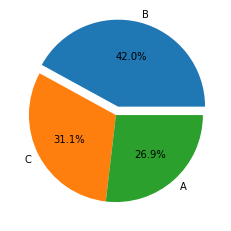

In [28]:
plt.pie(data['City_Category'].value_counts(),labels=['B', 'C', 'A'],autopct='%1.1f%%',explode = [0.1, 0.0, 0.0] )
plt.show()

## KNeighborsClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### Model_v1 - with main and supportive attributes
Product_ID,	User_ID, Purchase - has to be deleted, its unuque items

We also delete these attributes:

Occupation - int 

City_Category - A,B,C

Product_Category_1,2,3 - int

due to we want to start with only three attributes 


#### Data for KNN

- Gender - must be replaced by integers (numbers of categories)
Replace by: 'M': 0, 'F': 1

- Age - must be replaced by integers (numbers of categories)
Replace by: '0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7

- Stay_In_Current_City_Years - int

- Marital_Status - int (1,0) - our target

In [29]:
X = data.drop(columns=['User_ID', 'Product_ID',
                        'Occupation','City_Category','Marital_Status', 
                       'Product_Category_1','Product_Category_2','Product_Category_3', 'Purchase']) 

#replace age categories to digits
X["Age"] = X['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
X["Stay_In_Current_City_Years"] = X['Stay_In_Current_City_Years'].replace({'4+': 4})
X["Gender"] = X['Gender'].replace({'M': 0, 'F': 1})

X.head(3)

Gender  Age Stay_In_Current_City_Years  Products
0       1    1                          2         3
1       1    1                          2        21
2       1    1                          2        12

In [30]:
#Estimate Gender as a target and check
target = data['Marital_Status'].values
target[10:25]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
#Establish 70% training and 30% test
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.3, 
                                                              random_state=1, stratify=target)

In [32]:
#Pick algorithm for training set - KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [33]:
#Look at the score
KNN.score(X_test, target_test)

0.644378594239521

In [908]:
#Look at the prediction. Predict the class labels for the provided data
KNN.predict(X_test)

array(['M', 'M', 'F', ..., 'F', 'M', 'M'], dtype=object)

In [34]:
#Try different parametrs
KNN = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree',weights='distance')
KNN.fit(X_train, target_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [155]:
#Look at the score again
KNN.score(X_test, target_test)

0.6543106634913132

#### Conclusion
Score function returns the mean accuracy on the given test data and labels. As we can see in our data analysis, with the first set of parametrs we got 64.4% accurasy, with te second we obtained 65.4%. Its not the best result that we want to have. So, its better to use all possible attributes.

### Model_v2 with all attributes

Product_ID,	User_ID - has to be deleted, its unuque items

Data for KNN

- Gender - must be replaced by integers (numbers of categories) Replace by: 'M': 0, 'F': 1

- Age - must be replaced by integers (numbers of categories) Replace by: '0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7

- Stay_In_Current_City_Years - int

- Occupation - int

- City_Category - must be replaced by intagers'A': 1, 'B': 2, 'C': 3

- Stay_In_Current_City_Years - int

- Product_Category  - sum of all categories(1,2,3) - int - we fold these categories to get the final number of all productes purchesed by a person

- Purchase - must be changed (log), overwise it can influence on model 

- Marital_Status - int (1,0) - our target

In [35]:
X2 = data.drop(columns=['User_ID', 'Product_ID', 'Marital_Status'])

#replace
X2["Age"] = X2['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '50+ ': 7, '55+': 7})
X2["City_Category"] = X2['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
X2["Stay_In_Current_City_Years"] = X2['Stay_In_Current_City_Years'].replace({'4+': 4})
X2['Purchase'] = np.log(X2['Purchase'])
X2['Products'] = X2['Product_Category_1']+ X2['Product_Category_2'] + X2['Product_Category_3']
X2["Gender"] = X2['Gender'].replace({'M': 0, 'F': 1})

X2.drop(columns = ['Product_Category_1', 'Product_Category_2','Product_Category_3'], inplace=True)
X2.head(3)

Gender  Age  Occupation  City_Category Stay_In_Current_City_Years  \
0       1    1          10              1                          2   
1       1    1          10              1                          2   
2       1    1          10              1                          2   

   Purchase  Products  
0  9.032409         3  
1  9.629051        21  
2  7.259820        12

In [36]:
target2 = data['Marital_Status'].values

In [37]:
X2_train, X2_test, target2_train, target2_test = train_test_split(X2, target2, test_size=0.3, 
                                                              random_state=1, stratify=target2)

In [40]:
KNN2 = KNeighborsClassifier(n_neighbors=5)
KNN2.fit(X2_train, target2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
KNN2.score(X2_test, target_test)

0.7759073087667631

In [42]:
#Add parametrs to KNeighborsClassifie
#algorithm = 'kd_tree'
#leaf_size = 20
KNN2_feature = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size = 20)
KNN2_feature.fit(X2_train, target2_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
KNN2_feature.score(X2_test, target2_test)

0.775846710418674

#### Conclusion
Our score has become better since we decided to use all possible attributes. With the only three attributes we got maximum 65.4% accuracy. With all attributes score has reached 77.55%. Hence, some added attributes have influence on the score dramatically.

### Model_v3 with aggrigation (by User ID)

Its easy to notice that some users have purchased more than one time. Concequently, we can aggrigate all productes bought by each customer. Perhabs, we can get better score.


Data for KNN

- Gender - must be replaced by integers (numbers of categories) Replace by: 'M': 0, 'F': 1

- Age - must be replaced by integers (numbers of categories) Replace by: '0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7

- Stay_In_Current_City_Years - int

- Occupation - int

- City_Category - must be replaced by intagers'A': 1, 'B': 2, 'C': 3

- Stay_In_Current_City_Years - int

- Product_Category(1,2,3) - int - number of products in each category

- Purchase - must be changed (log), overwise it can influence on model

- Marital_Status - int (1,0) - our target

In [44]:
#prepare data. Step 1: groupby ID
data_unique_id = data[['User_ID','Gender','Age', 'City_Category', 
                              'Occupation', 'Stay_In_Current_City_Years', 
                       'Marital_Status']]
data_unique_id = data_unique_id.groupby('User_ID').first().reset_index()

In [45]:
data_unique_id

User_ID Gender    Age City_Category  Occupation  \
0     1000001      F   0-17             A          10   
1     1000002      M    55+             C          16   
2     1000003      M  26-35             A          15   
3     1000004      M  46-50             B           7   
4     1000005      M  26-35             A          20   
...       ...    ...    ...           ...         ...   
5886  1006036      F  26-35             B          15   
5887  1006037      F  46-50             C           1   
5888  1006038      F    55+             C           1   
5889  1006039      F  46-50             B           0   
5890  1006040      M  26-35             B           6   

     Stay_In_Current_City_Years  Marital_Status  
0                             2               0  
1                            4+               0  
2                             3               0  
3                             2               1  
4                             1               1  
...                         ...             ...  
5886                         4+               1  
5887                         4+               0  
5888                          2               0  
5889                         4+               1  
5890                          2               0  

[5891 rows x 7 columns]

In [47]:
#prepare data. Step 2: sum of products in each category and all purchases
dict_users = data[['User_ID','Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]
dict_users = dict_users.groupby('User_ID').agg(lambda x: x.sum()).reset_index()

In [48]:
#prepare data. Step 3: merge sets by User_ID
set_for_X3 = dict_users.merge(data_unique_id,on='User_ID')

In [49]:
set_for_X3.head()

User_ID  Product_Category_1  Product_Category_2  Product_Category_3  \
0  1000001                 213                 132                 148   
1  1000002                 354                 539                 359   
2  1000003                  93                 117                 148   
3  1000004                  33                 102                 127   
4  1000005                 659                 642                 207   

   Purchase Gender    Age City_Category  Occupation  \
0    334093      F   0-17             A          10   
1    810472      M    55+             C          16   
2    341635      M  26-35             A          15   
3    206468      M  46-50             B           7   
4    821001      M  26-35             A          20   

  Stay_In_Current_City_Years  Marital_Status  
0                          2               0  
1                         4+               0  
2                          3               0  
3                          2               1  
4                          1               1

In [50]:
#prepare data. Step 3: replace and divide into data and target
X3 = set_for_X3.drop(columns=['User_ID', 'Marital_Status']) 
X3["Age"] = X3['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '50+ ': 7, '55+': 7})
X3["City_Category"] = X3['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
X3["Stay_In_Current_City_Years"] = X3['Stay_In_Current_City_Years'].replace({'4+': 4})
X3['Purchase'] = np.log2(X3['Purchase'])
X3["Gender"] = X3['Gender'].replace({'M': 0, 'F': 1})


target3 = set_for_X3['Marital_Status'].values

In [51]:
X3.head(3)

Product_Category_1  Product_Category_2  Product_Category_3   Purchase  \
0                 213                 132                 148  18.349890   
1                 354                 539                 359  19.628403   
2                  93                 117                 148  18.382096   

   Gender  Age  City_Category  Occupation Stay_In_Current_City_Years  
0       1    1              1          10                          2  
1       0    7              3          16                          4  
2       0    3              1          15                          3

In [52]:
X3_train, X3_test, target3_train, target3_test = train_test_split(X3, target3, test_size=0.3, 
                                                              random_state=1, stratify=target3)

In [53]:
KNN3 = KNeighborsClassifier(n_neighbors=10)
KNN3.fit(X3_train, target3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [54]:
KNN3.score(X3_test, target3_test)

0.5554298642533937

#### Conclusion
Despite of the fact that we have to use all attributes, aggregation by User ID had a negative inpact on our results. 
In comparison, result with all attributes without aggrigation by User ID was 77.55%, after the aggrigation score has dropped to 55.55% accuraci. We can conclude that:
- the more data we have the better score we will get 
- aggrigation by User ID is not a better decision for prediction of Marital status/Gender. However, I can be appropriate choice for searching nearest neighbors and product category prediction.

## Decision tree
We can try another algorithm and compare results

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model_v1 with key and supprotive attributes

In [55]:
from sklearn.tree import DecisionTreeClassifier 
import sklearn.metrics as metrics
Data_tree = data.drop(columns=['User_ID','Product_ID', 'Marital_Status']) 


Data_tree["Age"] = Data_tree['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
Data_tree["City_Category"] = Data_tree['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
Data_tree["Stay_In_Current_City_Years"] = Data_tree['Stay_In_Current_City_Years'].replace({'4+': 4})
Data_tree["Stay_In_Current_City_Years"] = Data_tree['Stay_In_Current_City_Years'].astype(int)
Data_tree["Gender"] = Data_tree['Gender'].replace({'M': 0, 'F': 1})


Data_tree.head(3)

Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       1    1          10              1                           2   
1       1    1          10              1                           2   
2       1    1          10              1                           2   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                   0                   0      8370   
1                   1                   6                  14     15200   
2                  12                   0                   0      1422   

   Products  
0         3  
1        21  
2        12

In [56]:
#Pick only colomns we need
feature_cols = ['Age', 'Gender', 'Stay_In_Current_City_Years']
X_tree = Data_tree[feature_cols] # Features
y_tree = data['Marital_Status'].values # Target 

In [58]:
X_tree.head()

Age  Gender  Stay_In_Current_City_Years
0    1       1                           2
1    1       1                           2
2    1       1                           2
3    1       1                           2
4    7       0                           4

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=1) 

In [62]:
#Pick algorithm for training set - DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6687997285194006


### Model_v2 with all attributes

In [64]:
Data_tree = data.drop(columns=['User_ID','Product_ID', 'Marital_Status']) 

#replace age categories to digits
Data_tree["Age"] = Data_tree['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
Data_tree["City_Category"] = Data_tree['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
Data_tree["Stay_In_Current_City_Years"] = Data_tree['Stay_In_Current_City_Years'].replace({'4+': 4})
Data_tree["Stay_In_Current_City_Years"] = Data_tree['Stay_In_Current_City_Years'].astype(int)
Data_tree["Gender"] = Data_tree['Gender'].replace({'M': 0, 'F': 1})


Data_tree.head(3)

Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       1    1          10              1                           2   
1       1    1          10              1                           2   
2       1    1          10              1                           2   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                   0                   0      8370   
1                   1                   6                  14     15200   
2                  12                   0                   0      1422   

   Products  
0         3  
1        21  
2        12

In [65]:
X_tree = Data_tree
y_tree = data['Marital_Status'].values # Target 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=1) 

In [67]:
clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7701686452027318


In [83]:
#Tuning some parameters
clf_tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=4)
clf_tree = clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7846213512219656


#### Conclusion
We have compared two algoriths - DecisionTreeClassifier and KNeighborsClassifier and got these results:

Accuracy with key and supportiv attributes:
- DecisionTreeClassifier - 66.8%
- KNeighborsClassifier - 65.4%

Accuracy with all attributes
- DecisionTreeClassifier - 77%
- KNeighborsClassifier - 78.5%


DecisionTreeClassifier had better scores in all categories. However, it is possible to obtain better results with at least these features:
- tuning parameters in the algorithms (change them and test)
- changing values in splitting data (in our case we have 30/70)
- using all possible attributes 
- change attributes that have significant difference (like Purchases in our data set that influences on result due to its big value). For example, via np.log2
- normilize data if it possible 

We can also recommend to use algorithm for metaparameter tuning that will help to find better parameters for algorithms and pick an appropriate algorithm as well

## Model evaluation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [20]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import svm


In [12]:
X = data.drop(columns=['User_ID', 'Product_ID',
                        'Occupation','City_Category','Marital_Status', 
                       'Product_Category_1','Product_Category_2','Product_Category_3', 'Purchase']) 

#replace age categories to digits
X["Age"] = X['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
X["Stay_In_Current_City_Years"] = X['Stay_In_Current_City_Years'].replace({'4+': 4})
X["Gender"] = X['Gender'].replace({'M': 0, 'F': 1})

X.head(3)

Gender  Age Stay_In_Current_City_Years
0       1    1                          2
1       1    1                          2
2       1    1                          2

In [16]:
X_score = np.array(X)
y_score = np.array(data['Marital_Status'])

In [17]:
y_score

array([0, 0, 0, ..., 1, 0, 1])

In [21]:
clf = DecisionTreeClassifier()
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
scores = cross_validate(clf, X_score, y_score, scoring=scoring,
                         cv=5, return_train_score=True)
print(scores.keys())
print(scores['test_acc'])  

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[0.67156297 0.66874216 0.67049349 0.66767564 0.67050258]


In [25]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_score, y_score, cv=10)

In [26]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.00)


Scores in folders are almost the same. That means, we can take each sample of the given data (appropriate size) and results will be same 

## Metaparameter tuning - GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

For DecisionTreeClassifier

In [93]:
X_score, y_score = make_classification(n_samples=100, #Generate a random n-class classification problem
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


dtc = DecisionTreeClassifier(max_features= 'sqrt', min_samples_split=2) 

param_grid = { 
    'min_samples_split': [10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Exhaustive search over specified parameter values for an estimator
CV_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5) 
CV_rfc.fit(X_score, y_score)
print('Best papameters for DecisionTreeClassifier:', CV_rfc.best_params_)

Best papameters for DecisionTreeClassifier: {'max_features': 'sqrt', 'min_samples_split': 20}


In [88]:
print("Best parameter (CV score=%0.3f)" % CV_rfc.best_score_)

Best parameter (CV score=0.630)


For KNeighborsClassifier

In [94]:
X_score, y_score = make_classification(n_samples=100, #Generate a random n-class classification problem
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


KNC = KNeighborsClassifier(n_neighbors=5, algorithm = 'kd_tree') 

param_grid = { 
    'n_neighbors': [10, 50],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

CV_rfc = GridSearchCV(estimator=KNC, param_grid=param_grid, cv=5)
CV_rfc.fit(X_score, y_score)
print('Best papameters for KNeighborsClassifier:', CV_rfc.best_params_)

Best papameters for KNeighborsClassifier: {'algorithm': 'auto', 'n_neighbors': 10}
